In [1]:
# Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

In [2]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
  
# Core Libraries - Machine Learning
import sklearn
import xgboost as xgb


# Importing Classifiers - Modelling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from collections import Counter

## Importing train_test_split,cross_val_score,GridSearchCV,KFold - Validation and Optimization
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold

# Importing Metrics - Performance Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
data=pd.read_excel("nyuEDISample.xlsx",dtype=str)
data.head(2)

,ICN,GS04,GS05,BillingProviderName,ProviderNameHash,BillingProviderNPI,BillingProviderTIN,BillingProviderTaxonomy,ProviderAddressHash,ProviderAddressConcat,...,OrderingProviderLastName,OrderingProviderMiddleName,OrderingProviderNPI,AttendingNameHash,AttendingNameConcat,AttendingPhysicianFirstName,AttendingPhysicianLastName,AttendingPhysicianMiddleName,AttendingPhysicianNPI,AttendingPhysicianTaxonomy
0,CC48195094,20200604,19120100,NYU WINTHROP HOSPITAL,3967125298387020,1114925567,111633486,282N00000X,7539445231525890,259 FIRST STREETMINEOLANY115013957,...,NaN,NaN,NaN,2486032148531300,1GEORGESUNIL,1,GEORGE,SUNIL,1508029638,207P00000X
1,CC82439425,20200619,19201400,NYU WINTHROP HOSPITAL,3967125298387020,1114925567,111633486,282N00000X,7539445231525890,259 FIRST STREETMINEOLANY115013957,...,NaN,NaN,NaN,9765697474558140,1ATLURIPRASHANTI,1,ATLURI,PRASHANTI,1932275609,207RH0003X


In [4]:
round((data.isnull().sum()*100)/len(data),2)

def miss_data(df):
    x = ['column_name','missing_data', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    print(missing_data)
    
miss_data(data)

limitPer = len(data) * .80
df1 = data.dropna(thresh=limitPer,axis=1)

                     column_name missing_data  missing_in_percentage
0                            ICN            0               0.000000
1                           GS04            0               0.000000
2                           GS05            0               0.000000
3            BillingProviderName            0               0.000000
4               ProviderNameHash            0               0.000000
..                           ...          ...                    ...
78   AttendingPhysicianFirstName         6596              27.791354
79    AttendingPhysicianLastName        15117              63.693436
80  AttendingPhysicianMiddleName        15117              63.693436
81         AttendingPhysicianNPI         6596              27.791354
82    AttendingPhysicianTaxonomy        15232              64.177973

[83 rows x 3 columns]


In [5]:
df1.head(2)

,ICN,GS04,GS05,BillingProviderName,ProviderNameHash,BillingProviderNPI,BillingProviderTIN,ProviderAddressHash,ProviderAddressConcat,BillingProviderAddress1,...,ProviderBillingZip,ProviderBillingZip4,PayToAddressHash,PaytoAddressConcat,PayToAddress1,PayToAddressCity,PayToAddressState,PayToAddressZip,PayToZip,PayToZip4
0,CC48195094,20200604,19120100,NYU WINTHROP HOSPITAL,3967125298387020,1114925567,111633486,7539445231525890,259 FIRST STREETMINEOLANY115013957,259 FIRST STREET,...,11501,3957,7109451749141380,PO BOX 412455BOSTONMA22412455,PO BOX 412455,BOSTON,MA,22412455,22412,455
1,CC82439425,20200619,19201400,NYU WINTHROP HOSPITAL,3967125298387020,1114925567,111633486,7539445231525890,259 FIRST STREETMINEOLANY115013957,259 FIRST STREET,...,11501,3957,7109451749141380,PO BOX 412455BOSTONMA22412455,PO BOX 412455,BOSTON,MA,22412455,22412,455


In [6]:
df1=df1.fillna("NA")
df1['Identifier'] = df1["BillingProviderName"].str.lower()
df1['Identifier']=df1['Identifier'].astype(str)

In [7]:
#First column
cols = list(df1.columns)
cols = [cols[-1]] + cols[:-1]
df1 = df1[cols]

df1.head(2)

,Identifier,ICN,GS04,GS05,BillingProviderName,ProviderNameHash,BillingProviderNPI,BillingProviderTIN,ProviderAddressHash,ProviderAddressConcat,...,ProviderBillingZip,ProviderBillingZip4,PayToAddressHash,PaytoAddressConcat,PayToAddress1,PayToAddressCity,PayToAddressState,PayToAddressZip,PayToZip,PayToZip4
0,nyu winthrop hospital,CC48195094,20200604,19120100,NYU WINTHROP HOSPITAL,3967125298387020,1114925567,111633486,7539445231525890,259 FIRST STREETMINEOLANY115013957,...,11501,3957,7109451749141380,PO BOX 412455BOSTONMA22412455,PO BOX 412455,BOSTON,MA,22412455,22412,455
1,nyu winthrop hospital,CC82439425,20200619,19201400,NYU WINTHROP HOSPITAL,3967125298387020,1114925567,111633486,7539445231525890,259 FIRST STREETMINEOLANY115013957,...,11501,3957,7109451749141380,PO BOX 412455BOSTONMA22412455,PO BOX 412455,BOSTON,MA,22412455,22412,455


In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=.3)

# Training dataset

In [9]:
idea=train.iloc[:,0:1]
traincorpus=[]
for index,row in idea.iterrows():
    traincorpus.append(row['Identifier'])
    
    
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(traincorpus)

#vectorizer.get_feature_names()

#print(X.toarray())     

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X_train)
print(tfidf.shape )

(16613, 297)


In [10]:
y_train=train["BillingProviderTIN"]

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))



In [15]:
X_train=X_train.todense()

In [16]:
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'

In [17]:
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: Accuracy is %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: Accuracy is 0.999218 (0.001175)
KNN: Accuracy is 0.999278 (0.000361)
DC: Accuracy is 0.999880 (0.000241)
NB: Accuracy is 0.941190 (0.007102)
RF: Accuracy is 0.999880 (0.000241)
AdaBoost: Accuracy is 0.999218 (0.000715)
GradientBoosting: Accuracy is 0.999880 (0.000241)


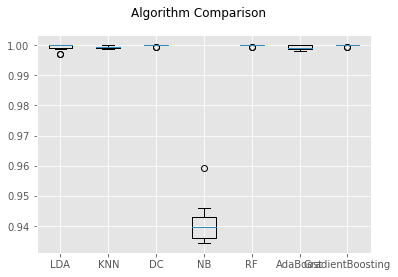

In [18]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Test Data

In [19]:
idea=test.iloc[:,0:1]
testcorpus=[]
for index,row in idea.iterrows():
    testcorpus.append(row['Identifier'])
    
    
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_test = vectorizer.fit_transform(testcorpus)

#vectorizer.get_feature_names()

#print(X.toarray())     

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X_test)
print(tfidf.shape )

(7121, 286)


In [20]:
y_test=test["BillingProviderTIN"]

In [21]:
X_test=X_test.todense()

In [22]:
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: Accuracy is %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: Accuracy is 0.997893 (0.001439)
KNN: Accuracy is 0.998596 (0.000888)
DC: Accuracy is 0.999719 (0.000562)
NB: Accuracy is 0.999438 (0.000688)
RF: Accuracy is 0.999719 (0.000562)
AdaBoost: Accuracy is 0.999719 (0.000562)
GradientBoosting: Accuracy is 0.999719 (0.000562)


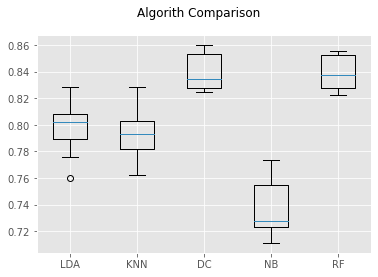

In [27]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Complete Datadet

In [23]:
idea=df1.iloc[:,0:1]
corpus=[]
for index,row in idea.iterrows():
    corpus.append(row['Identifier'])
    
    
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

#vectorizer.get_feature_names()

#print(X.toarray())     

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )

(23734, 302)


In [24]:
y=df1["BillingProviderTIN"]

In [25]:
X=X.todense()

In [26]:
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: Accuracy is %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: Accuracy is 0.976874 (0.067975)
KNN: Accuracy is 0.999368 (0.001002)
DC: Accuracy is 0.999916 (0.000253)
NB: Accuracy is 0.959899 (0.071994)
RF: Accuracy is 0.999916 (0.000253)
AdaBoost: Accuracy is 0.999410 (0.001252)
GradientBoosting: Accuracy is 0.999916 (0.000253)


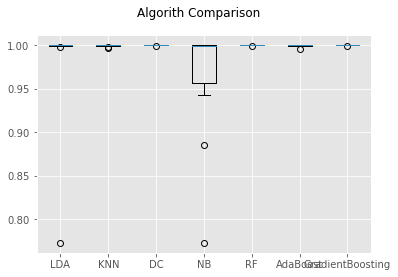

In [27]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
# Final Model

In [29]:
data=pd.read_excel("nyuEDISample.xlsx",dtype=str)

round((data.isnull().sum()*100)/len(data),2)

def miss_data(df):
    x = ['column_name','missing_data', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    print(missing_data)
    
miss_data(data)

limitPer = len(data) * .80
df1 = data.dropna(thresh=limitPer,axis=1)

df1=df1.fillna("NA")
df1['Identifier'] = df1["BillingProviderName"].str.lower()
df1['Identifier']=df1['Identifier'].astype(str)

#First column
cols = list(df1.columns)
cols = [cols[-1]] + cols[:-1]
df1 = df1[cols]

df1.head(2)

                     column_name missing_data  missing_in_percentage
0                            ICN            0               0.000000
1                           GS04            0               0.000000
2                           GS05            0               0.000000
3            BillingProviderName            0               0.000000
4               ProviderNameHash            0               0.000000
..                           ...          ...                    ...
78   AttendingPhysicianFirstName         6596              27.791354
79    AttendingPhysicianLastName        15117              63.693436
80  AttendingPhysicianMiddleName        15117              63.693436
81         AttendingPhysicianNPI         6596              27.791354
82    AttendingPhysicianTaxonomy        15232              64.177973

[83 rows x 3 columns]


,Identifier,ICN,GS04,GS05,BillingProviderName,ProviderNameHash,BillingProviderNPI,BillingProviderTIN,ProviderAddressHash,ProviderAddressConcat,...,ProviderBillingZip,ProviderBillingZip4,PayToAddressHash,PaytoAddressConcat,PayToAddress1,PayToAddressCity,PayToAddressState,PayToAddressZip,PayToZip,PayToZip4
0,nyu winthrop hospital,CC48195094,20200604,19120100,NYU WINTHROP HOSPITAL,3967125298387020,1114925567,111633486,7539445231525890,259 FIRST STREETMINEOLANY115013957,...,11501,3957,7109451749141380,PO BOX 412455BOSTONMA22412455,PO BOX 412455,BOSTON,MA,22412455,22412,455
1,nyu winthrop hospital,CC82439425,20200619,19201400,NYU WINTHROP HOSPITAL,3967125298387020,1114925567,111633486,7539445231525890,259 FIRST STREETMINEOLANY115013957,...,11501,3957,7109451749141380,PO BOX 412455BOSTONMA22412455,PO BOX 412455,BOSTON,MA,22412455,22412,455


In [30]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=.3)

In [31]:
idea=train.iloc[:,0:1]
trainn=[]
for index,row in idea.iterrows():
    trainn.append(row['Identifier'])
    
    
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
xtrain = vectorizer.fit_transform(trainn)

#vectorizer.get_feature_names()

#print(X.toarray())     

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(xtrain)
print(tfidf.shape )

(16613, 292)


In [32]:
ytrain=train["BillingProviderTIN"]

In [33]:
# Clustering the document with KNN classifier
modelknn = KNeighborsClassifier(n_neighbors=5)
modelknn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
idea=df1.iloc[:,0:1]
corpusnew=[]
for index,row in idea.iterrows():
    corpusnew.append(row['Identifier'])

In [36]:
len(corpusnew)

23734

In [37]:
Test22 = vectorizer.transform(corpusnew)

In [38]:
prediction = modelknn.predict(Test22)
print(" These entitiy belongs to  ", prediction[0:3])

 These entitiy belongs to   ['133971298' '133971298' '133971298']


In [39]:
idea={'Identifier':corpus, 'Cluster':prediction} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[prediction], columns=['Identifier','Cluster']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.



                                                  Identifier    Cluster
133971298                              nyu winthrop hospital  133971298
133971298                              nyu winthrop hospital  133971298
133971298             nyu winthrop hospital home care agency  133971298
133971298                        nyu langone hospitals tisch  133971298
133971298                        nyu langone hospitals tisch  133971298
...                                                      ...        ...
135562308                           nyu nassau gi associates  135562308
135562308                     nyu gastroenterology associate  135562308
135562308                  nyu emergency medicine associates  135562308
135562308             winthrop geriatric medicine associates  135562308
135562308  nyu langone women's health associates-new hyde...  135562308

[23734 rows x 2 columns]


135562308    14988
133971298     8746
Name: Cluster, dtype: int64


In [40]:
df1['Cluster'] = prediction

In [41]:
df1.to_excel (r'C:\Users\rbalani1\Desktop\EEM\06NYU\NYU_predicted2.xlsx', index = False, header=True)

In [42]:
y_pred=df1["BillingProviderTIN"]

In [43]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_pred, prediction))

0.9991994606893064
